# Importing the libraries we will be using

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

### Reading the data

In [3]:
train = pd.read_csv(r'/kaggle/input/digit-recognizer/train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv(r'/kaggle/input/digit-recognizer/test.csv')


# Extracting labels and reshaping pixel values

In [5]:
# Extract labels and pixel values
labels = train['label']
pixels = train.drop('label', axis=1)

In [6]:
# Reshape pixel values and normalize
pixels = pixels.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [7]:
# Reshape and normalize pixel values
test_pixels = test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [8]:

# One-hot encode labels
labels = to_categorical(labels)


# Splitting the dataset and building the CNN MODEL

In [9]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    pixels, labels, test_size=0.2, random_state=42
)

In [10]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# Example: Adding dropout and batch normalization to the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/10
525/525 [==============================] - 29s 51ms/step - loss: 0.3938 - accuracy: 0.8790 - val_loss: 0.5279 - val_accuracy: 0.8399
Epoch 2/10
525/525 [==============================] - 25s 48ms/step - loss: 0.1281 - accuracy: 0.9609 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 3/10
525/525 [==============================] - 25s 47ms/step - loss: 0.0950 - accuracy: 0.9709 - val_loss: 0.0433 - val_accuracy: 0.9862
Epoch 4/10
525/525 [==============================] - 26s 50ms/step - loss: 0.0788 - accuracy: 0.9746 - val_loss: 0.0362 - val_accuracy: 0.9871
Epoch 5/10
525/525 [==============================] - 25s 47ms/step - loss: 0.0707 - accuracy: 0.9783 - val_loss: 0.0343 - val_accuracy: 0.9887
Epoch 6/10
525/525 [==============================] - 26s 50ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 7/10
525/525 [==============================] - 25s 47ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0275 - val_accuracy:

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(val_images, val_labels)
print(f'Validation accuracy: {test_acc * 100:.2f}%')

263/263 [==============================] - 2s 8ms/step - loss: 0.0300 - accuracy: 0.9905
Validation accuracy: 99.05%


# Making prediction on test data

In [15]:
# Make predictions on the test set
test_predictions = model.predict(test_pixels)

875/875 [==============================] - 7s 7ms/step


# Visualizing our results

In [16]:
# Function to display test images along with their predicted labels
def plot_test_images(images, labels_pred):
    plt.figure(figsize=(10, 10))
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i][:, :, 0], cmap='gray')  # Assuming images are grayscale
        plt.axis('off')
        plt.title(f"Predicted: {np.argmax(labels_pred[i])}")

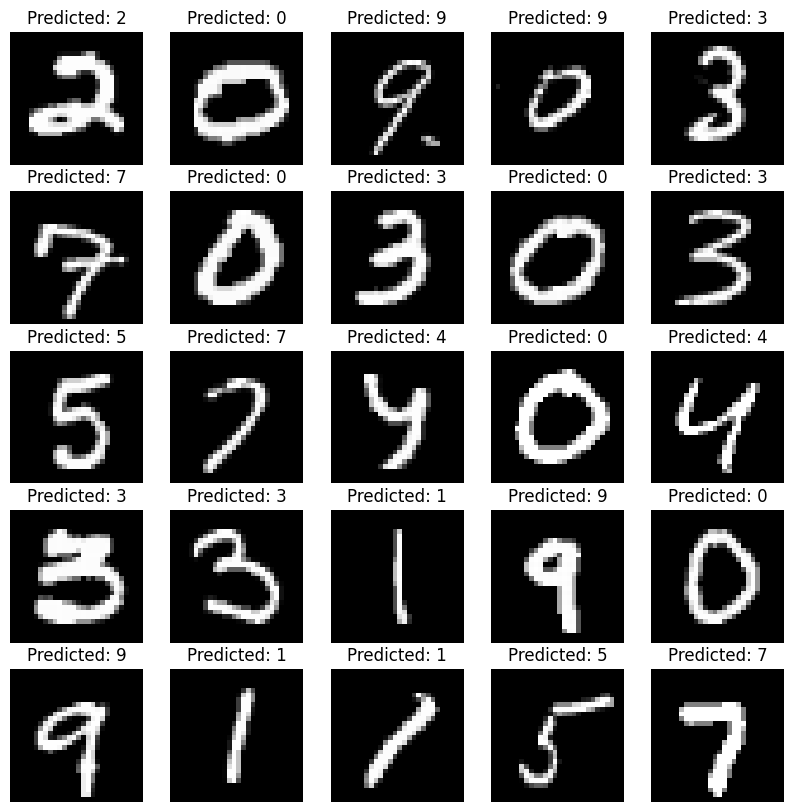

In [17]:
# Plot a sample of test images
plot_test_images(test_pixels, test_predictions)

plt.show()

# Preparing the submission file

In [18]:
# Get the predicted labels as integers
predicted_labels = np.argmax(test_predictions, axis=1)

In [19]:
# Create a DataFrame with ImageId and Label columns
submission_df = pd.DataFrame({'ImageId': range(1, len(test) + 1), 'Label': predicted_labels})

In [20]:
# Save the DataFrame to a CSV file with the specified format
submission_df.to_csv('submission.csv', index=False)


In [21]:
# Display the first few rows of the submission DataFrame
print(submission_df.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
